In [1]:
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
import numpy as np

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain[1,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

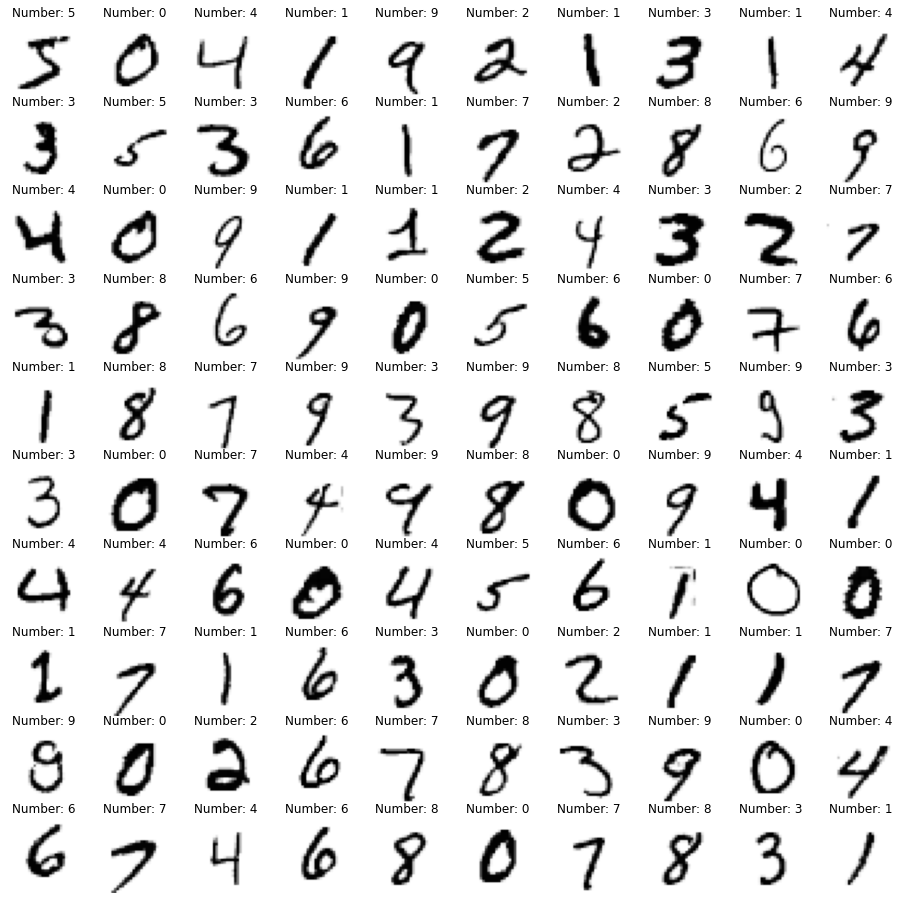

In [5]:
plt.figure(figsize=(16,16))
for i in range(100):
    plt.subplot(10, 10, i+1,title=f'Number: {ytrain[i]}')
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [6]:
print('xtrain shape:', xtrain.shape)
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')
print(xtrain[0].shape, 'image shape')
print('ytrain shape:', ytrain.shape)

xtrain shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape
ytrain shape: (60000,)


In [7]:
Xtrain = (xtrain[:,:,:,np.newaxis]/np.max(xtrain)).copy()
Xtest = (xtest.reshape(10000, 28, 28, 1)/np.max(xtest)).copy()

In [8]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [9]:
ytrain[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
np.argmax(ytrain,axis=1),np.argmax(ytest,axis=1)

(array([5, 0, 4, ..., 5, 6, 8]), array([7, 2, 1, ..., 4, 5, 6]))

In [11]:
print('After preprocessing:\n')
print('Xtrain shape:', Xtrain.shape)
print(Xtrain.shape[0], 'train samples')
print(Xtest.shape[0], 'test samples')
print(Xtrain[0].shape, 'image shape')
print('ytrain shape:', ytrain.shape)

After preprocessing:

Xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape
ytrain shape: (60000, 10)


In [12]:
Xtrain[0].shape

(28, 28, 1)

In [13]:
K.clear_session()

model = Sequential([
    
    Conv2D(6, kernel_size=(5,5),strides=(1,1),
           activation='relu',input_shape=Xtrain[0].shape,
           padding='same'),
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'same'),
    
    Conv2D(16, kernel_size=(5,5),strides=(1,1),
           activation = 'tanh', padding = 'same'),
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'same'),
    
    Flatten(),
    
    Dense(120,activation='relu'),
    
    Dense(86,activation='tanh'),
    
    Dense(10,activation = 'softmax')
    
])

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 86)                1

In [16]:
history = model.fit(Xtrain, ytrain, epochs=3,batch_size=150,
                    validation_split = 0.2)

Epoch 1/3
320/320 [==============================] - 10s 30ms/step - loss: 0.2966 - accuracy: 0.9160 - val_loss: 0.0932 - val_accuracy: 0.9711
Epoch 2/3
320/320 [==============================] - 13s 41ms/step - loss: 0.0717 - accuracy: 0.9786 - val_loss: 0.0651 - val_accuracy: 0.9814
Epoch 3/3
320/320 [==============================] - 14s 45ms/step - loss: 0.0474 - accuracy: 0.9857 - val_loss: 0.0544 - val_accuracy: 0.9834


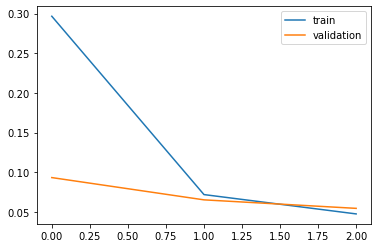

In [17]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend();

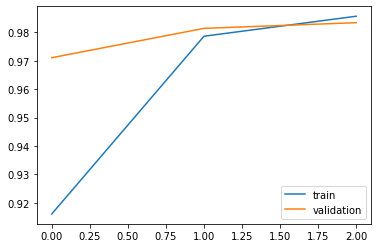

In [18]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'], label ='validation')
plt.legend();

In [19]:
model.evaluate(x=Xtest, y=ytest)

313/313 [==============================] - 3s 10ms/step - loss: 0.0452 - accuracy: 0.9845


[0.04518873617053032, 0.984499990940094]